In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import copy

Поиск набиолее протяженного участка (алгоритм Хавмана)

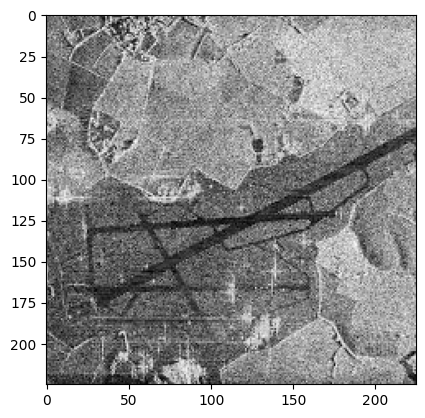

In [249]:
import math
image_lines = cv2.imread("sar_3.jpg")
#image_lines = copy.deepcopy(image)
image_lines = cv2.cvtColor(image_lines, cv2.COLOR_RGB2BGR)
image_lines_gray = cv2.cvtColor(image_lines, cv2.COLOR_BGR2GRAY)
plt.imshow(image_lines)

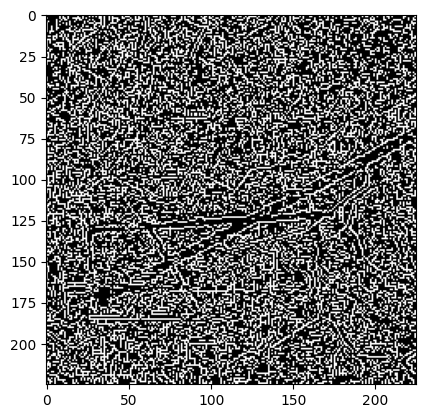

In [ ]:
canny = cv2.Canny(image_lines_gray,100,150, apertureSize=3)
lines = cv2.HoughLines(canny, 1, np.pi / 180, 140)

In [251]:
max_length = 0
longest_line = None

if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            length = np.sqrt((pt1[0] - pt2[0]) ** 2 + (pt1[1] - pt2[1]) ** 2)
            if length > max_length:
                max_length = length
                longest_line = (pt1, pt2)

if longest_line is not None:
    image_with_line = image.copy()
    cv2.line(image_lines, longest_line[0], longest_line[1], (0, 0, 255), 3, cv2.LINE_AA)

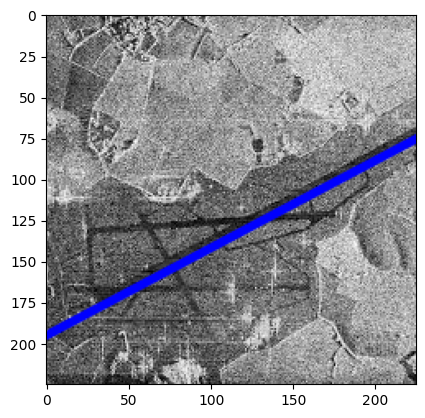

In [252]:
plt.imshow(image_lines)

Выделение участка дороги (тестирование алгоритмв бинаризации)

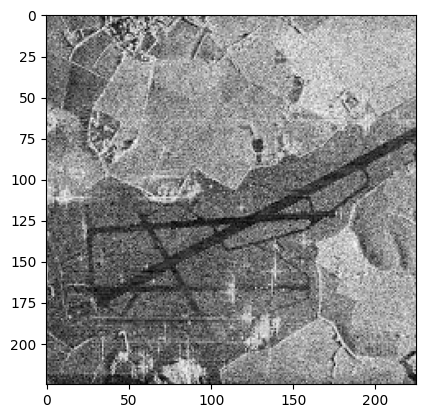

In [253]:
#точечная бинаризация
image = cv2.imread("sar_3.jpg")
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap="gray")

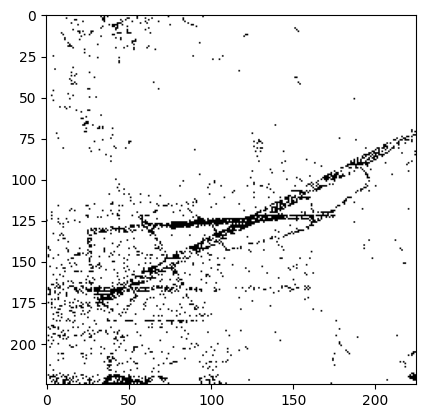

In [255]:
bin_img = copy.deepcopy(image_gray)
T  = 50
bin_img[image_gray < T] = 0
bin_img[image_gray >= T] = 255

plt.imshow(bin_img, cmap="gray")

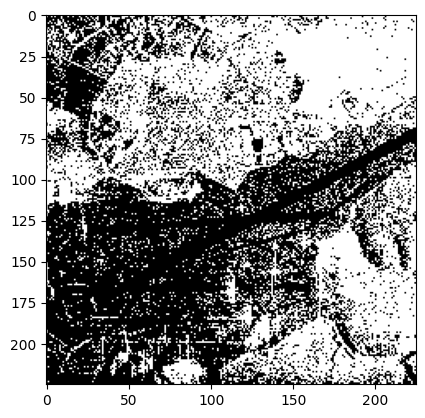

In [261]:
_,th2 = cv2.threshold(image_gray,150,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(th2, cmap="gray")

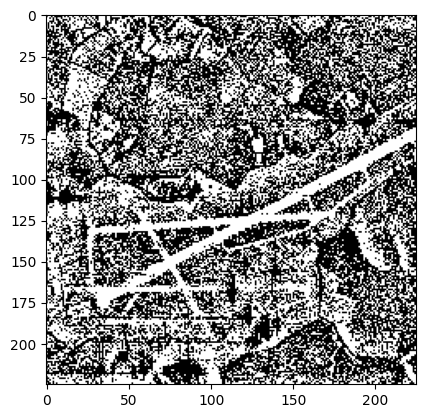

In [279]:
#адаптивная бинаризация
th3 = cv2.adaptiveThreshold(image_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY_INV,61,1)
plt.imshow(th3, cmap ="gray")

In [ ]:
#оператор Собеля

In [ ]:
scale = 1
delta = 0
ddepth = cv2.CV_16S
grad_x = cv2.Sobel(image_gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
grad_y = cv2.Sobel(image_gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

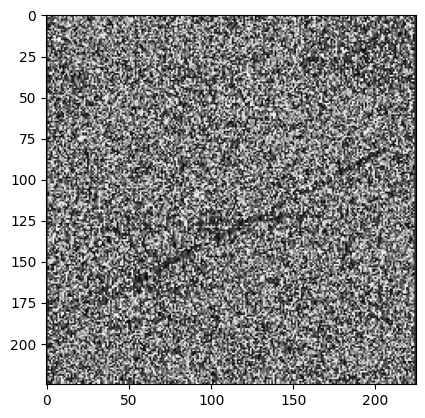

In [282]:
plt.imshow((grad_x - grad_x.min())*255, cmap="gray")

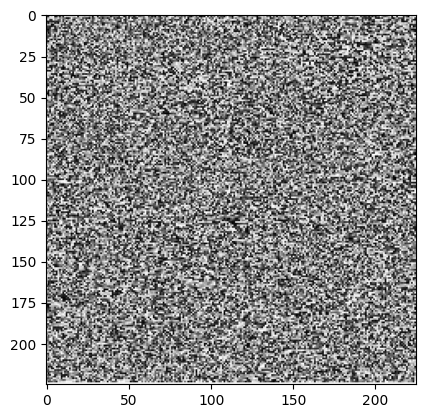

In [281]:
plt.imshow((grad_y - grad_y.min())*255, cmap="gray")

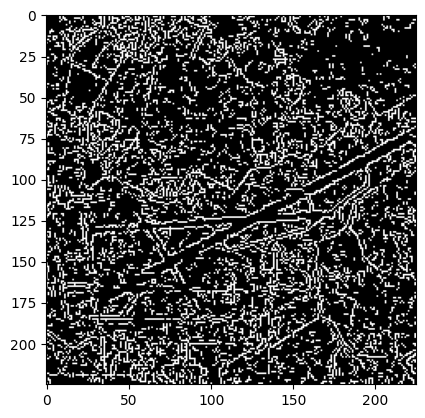

In [289]:
#Canny
edges = cv2.Canny(image_gray,200,255)
plt.imshow(edges, cmap="gray")